# *Root Path for Dataset*

In [1]:
ROOT_DIR = '/kaggle/input/iconsv6'

# *Install and Import Necessary Library*

In [2]:
!pip install ultralytics

# Importing necessary libraries
import os
import yaml
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
import seaborn as sns
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 13.4 MB/s eta 0:00:00a 0:00:01


# *Make Plot Function*

In [3]:
# Function to load dataset configuration
def load_dataset_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

# Function to count instances per class in a given set (train/val)
def count_instances(label_path, classes):
    instance_count = defaultdict(int)
    for root, _, files in os.walk(label_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        class_id = int(line.split()[0])
                        instance_count[classes[class_id]] += 1
                        
    return instance_count


# Function to plot bar and pie charts
def plot_distribution(count_dict, title):
    if not count_dict:
        print(f"No data found for {title}")
        return
    
    labels = list(count_dict.keys())
    values = list(count_dict.values())
    
    if not values:
        print(f"No instances found for {title}")
        return

    # Convert labels and values to a pandas Series
    labels_series = pd.Series(labels)
    values_series = pd.Series(values)

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=labels_series, y=values_series, palette='viridis')
    plt.title(f'{title} - Bar Chart')
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=45)

    # Annotate each bar with the exact number
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values_series, labels=labels_series, autopct=lambda p: f'{p:.1f}% ({int(p * sum(values_series) / 100)})', 
            startangle=140, colors=sns.color_palette('viridis', len(labels_series)))
    plt.title(f'{title} - Pie Chart')
    plt.show()


# *Count Train and Validation Data*

In [4]:

config_path = os.path.join(ROOT_DIR, "data.yaml")  # Update this path
config = load_dataset_config(config_path)

# Extract paths and class names from config
train_label_path = os.path.join(ROOT_DIR, "train/labels")
val_label_path = os.path.join(ROOT_DIR, "valid/labels")
classes = config['names']

train_instance_count = count_instances(train_label_path, classes)
print(train_instance_count)
val_instance_count = count_instances(val_label_path, classes)
print(val_instance_count)

defaultdict(<class 'int'>, {'musholah': 243, 'toilet': 237, 'taman': 240, 'ruang keluarga': 261, 'ruang tamu': 261, 'ruang belajar': 249, 'kamar tidur': 231, 'kamar mandi': 270, 'garasi': 247, 'ruang makan': 240})
defaultdict(<class 'int'>, {'kamar tidur': 29, 'ruang belajar': 22, 'toilet': 27, 'kamar mandi': 28, 'ruang makan': 28, 'ruang keluarga': 29, 'ruang tamu': 31, 'garasi': 32, 'taman': 23, 'musholah': 27})


# *Training Set Distribution*

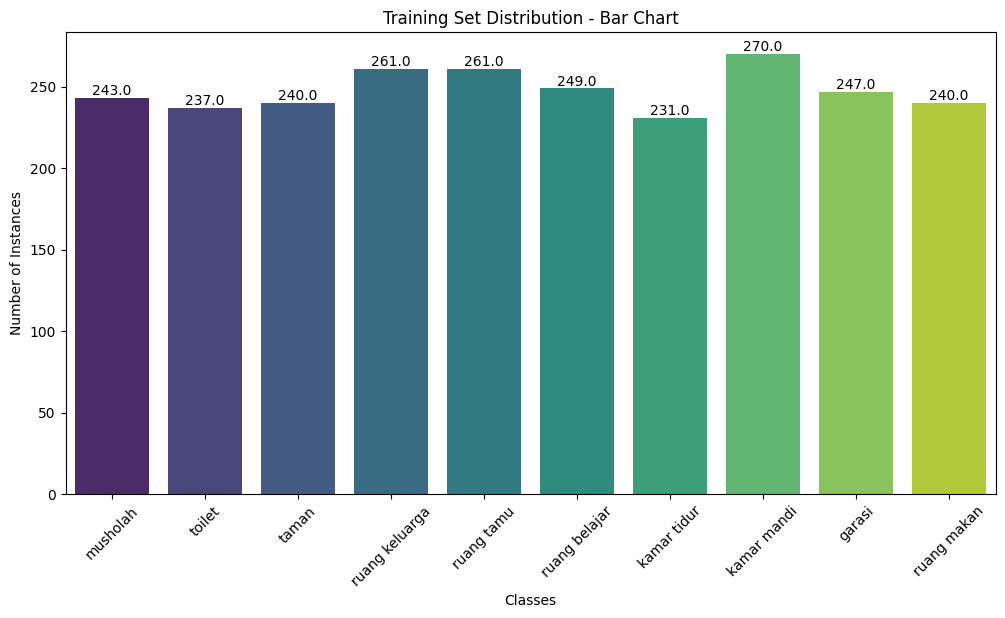

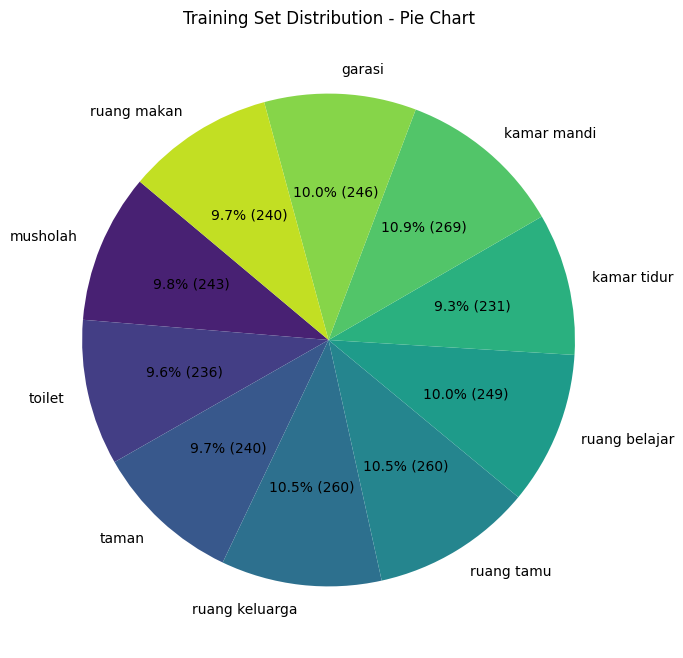

Total = 2479


In [5]:
plot_distribution(train_instance_count, 'Training Set Distribution')
print("Total =", sum(train_instance_count.values()))

# *Validation Set Distribution*

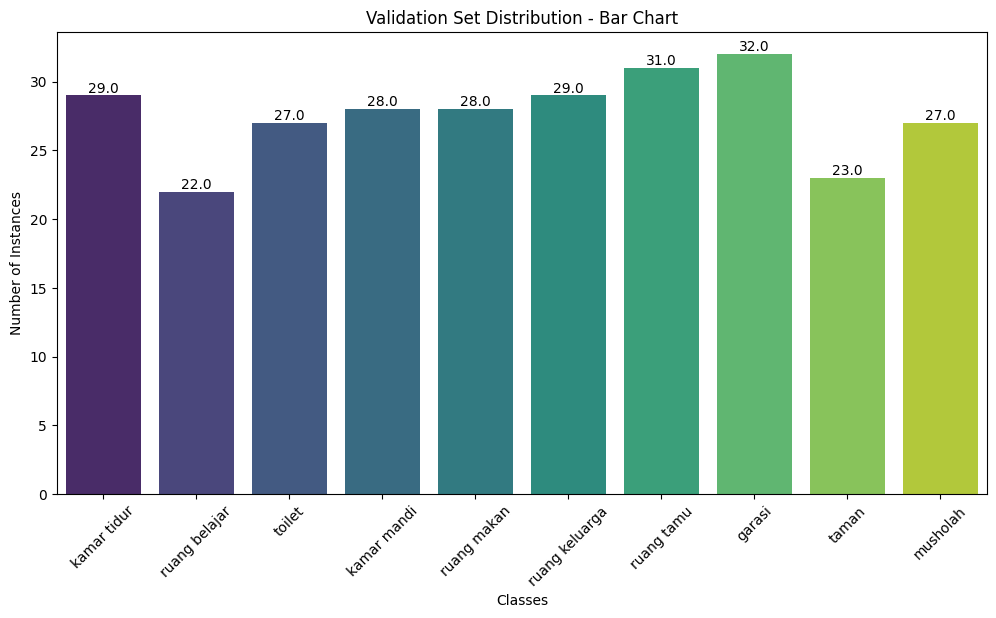

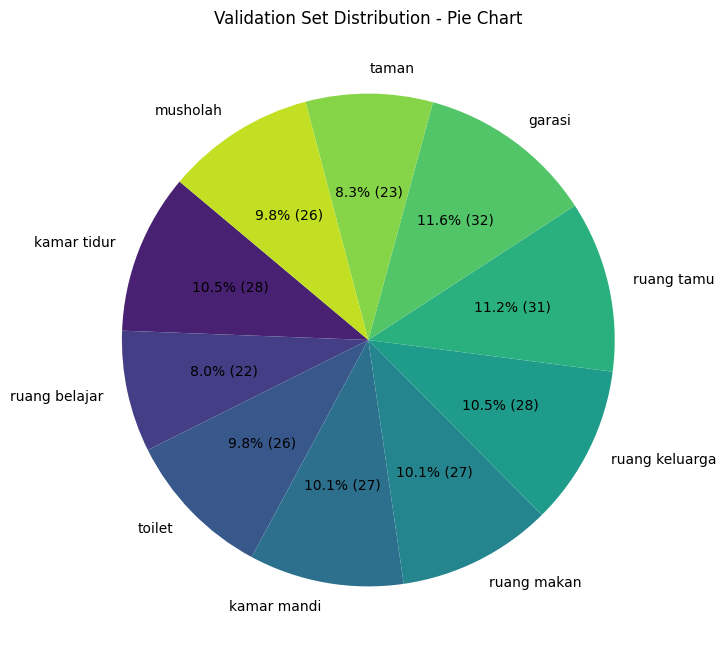

Total = 276


In [26]:
plot_distribution(val_instance_count, 'Validation Set Distribution')
print("Total =", sum(val_instance_count.values()))

# *Training*

In [6]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=10)  # train the model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 21.3MB/s]


Ultralytics 8.3.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/iconsv6/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 4.03MB/s]
2024-10-23 10:14:22,494	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-23 10:14:23,277	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 19.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/iconsv6/train/labels... 804 images, 1 backgrounds, 0 corrupt: 100%|██████████| 804/804 [00:01<00:00, 404.52it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/iconsv6/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/iconsv6/valid/labels... 93 images, 0 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<00:00, 448.84it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/iconsv6/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.37G      1.223      3.716       1.22         11        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         93        276      0.983     0.0594      0.345      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.32G      1.084      2.003      1.132          9        640: 100%|██████████| 51/51 [00:10<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         93        276      0.816      0.833      0.936      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.32G      1.055      1.504      1.104          8        640: 100%|██████████| 51/51 [00:10<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         93        276      0.941      0.886      0.973      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.32G     0.9857      1.323      1.069         13        640: 100%|██████████| 51/51 [00:10<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         93        276      0.913      0.913      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.32G     0.9463      1.215      1.036         11        640: 100%|██████████| 51/51 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         93        276      0.959      0.945      0.983      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.32G     0.9055      1.078       1.02         11        640: 100%|██████████| 51/51 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         93        276      0.976      0.971      0.992      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.33G     0.8488      1.008     0.9907         11        640: 100%|██████████| 51/51 [00:10<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         93        276       0.98      0.975      0.992      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.31G     0.8067     0.9304     0.9711         13        640: 100%|██████████| 51/51 [00:10<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         93        276       0.97      0.981      0.991      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.32G     0.7647     0.8966     0.9578         12        640: 100%|██████████| 51/51 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         93        276      0.977      0.986      0.991      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.33G     0.7294     0.8401     0.9386         13        640: 100%|██████████| 51/51 [00:10<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         93        276      0.989      0.987      0.993      0.832



10 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]


                   all         93        276      0.989      0.987      0.993      0.831
           kamar mandi          6         28      0.963      0.964      0.976      0.839
           ruang makan          5         28          1       0.99      0.995      0.653
           kamar tidur         12         29       0.99          1      0.995      0.858
        ruang keluarga         14         29       0.98          1      0.995      0.794
              musholah          9         27          1      0.978      0.995      0.921
                garasi         11         32      0.997          1      0.995      0.764
                 taman          6         23          1      0.938      0.995      0.895
            ruang tamu         10         31      0.996          1      0.995      0.904
         ruang belajar          8         22      0.971          1      0.995      0.874
                toilet         12         27       0.99          1      0.995      0.813
Speed: 0.2ms preproce

lr/pg0,▃▆█▇▆▅▄▃▂▁
lr/pg1,▃▆█▇▆▅▄▃▂▁
lr/pg2,▃▆█▇▆▅▄▃▂▁
metrics/mAP50(B),▁▇████████
metrics/mAP50-95(B),▁▆▆▇▇▇████
metrics/precision(B),█▁▆▅▇▇█▇██
metrics/recall(B),▁▇▇▇██████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▅▄▃▃▂▂▁


# *Confusion Matrix*

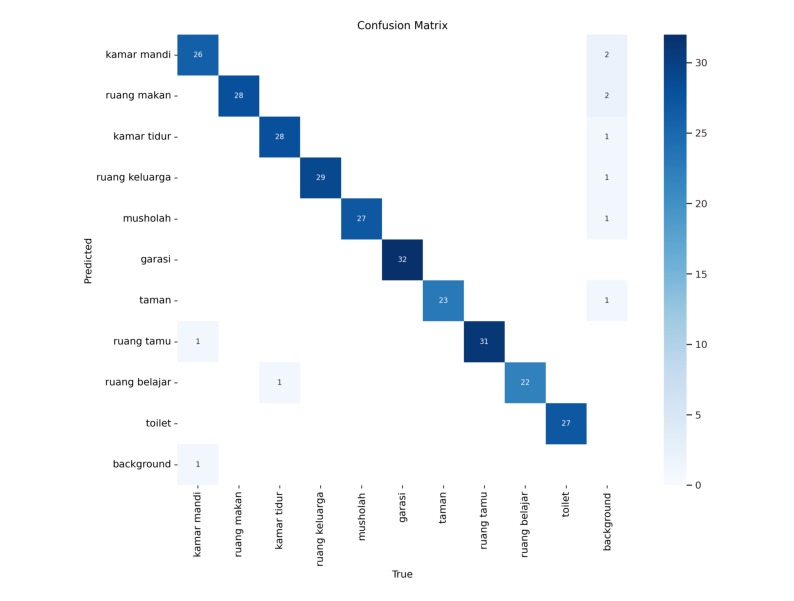

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ROOT_OUT = '/kaggle/working/runs/detect/train'
# Path menuju gambar confusion matrix
image_path = ROOT_OUT+'/confusion_matrix.png' 

# Membaca gambar menggunakan matplotlib
img = mpimg.imread(image_path)

# Menampilkan gambar menggunakan pyplot
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Menghilangkan sumbu
plt.show()

# *Recall, Precision, and F1 Curve*

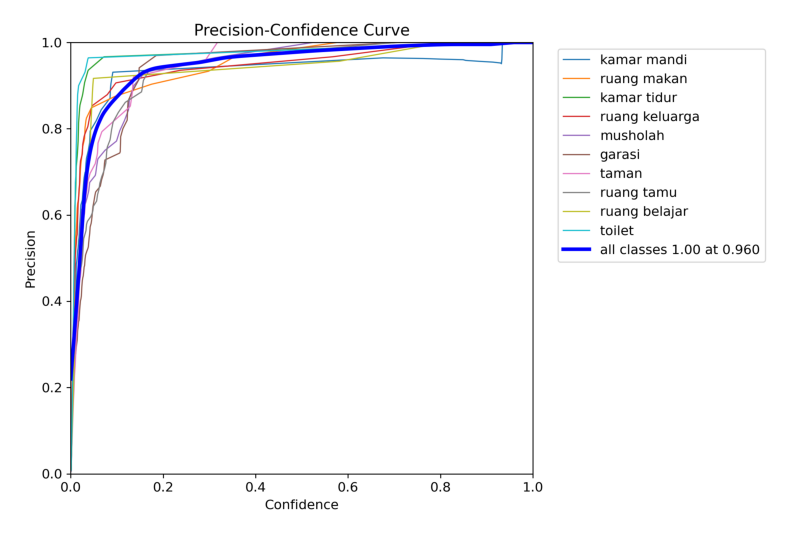

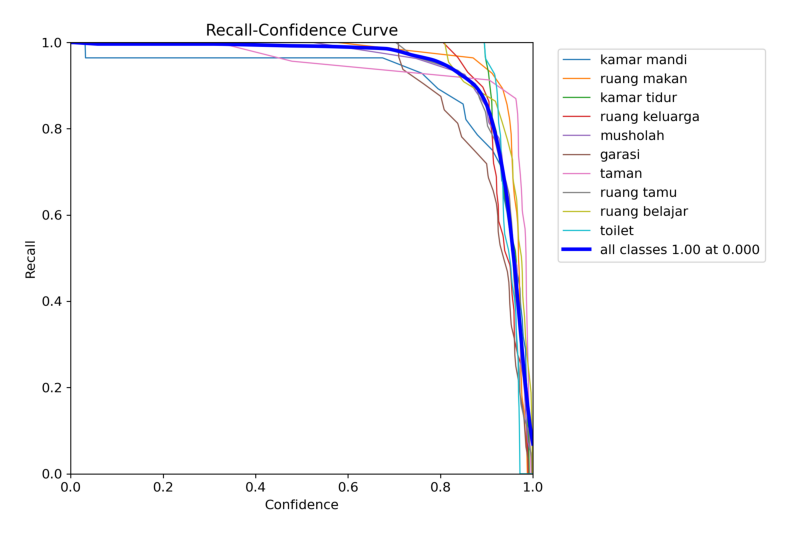

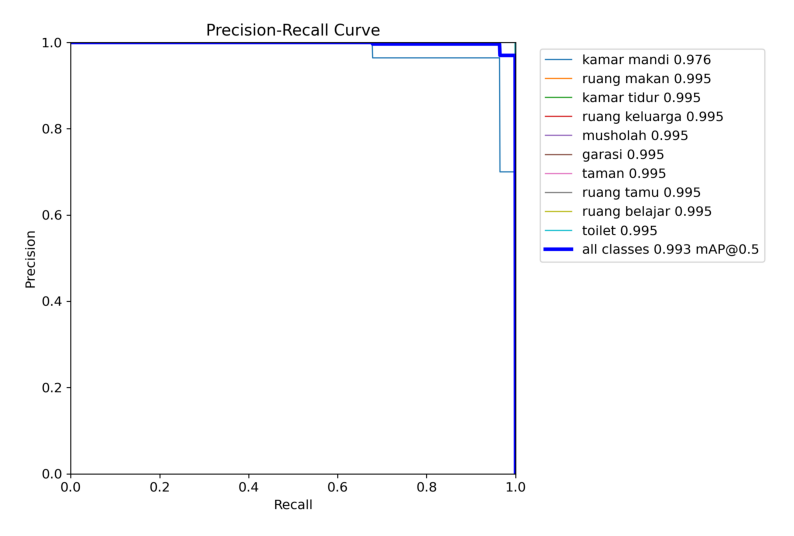

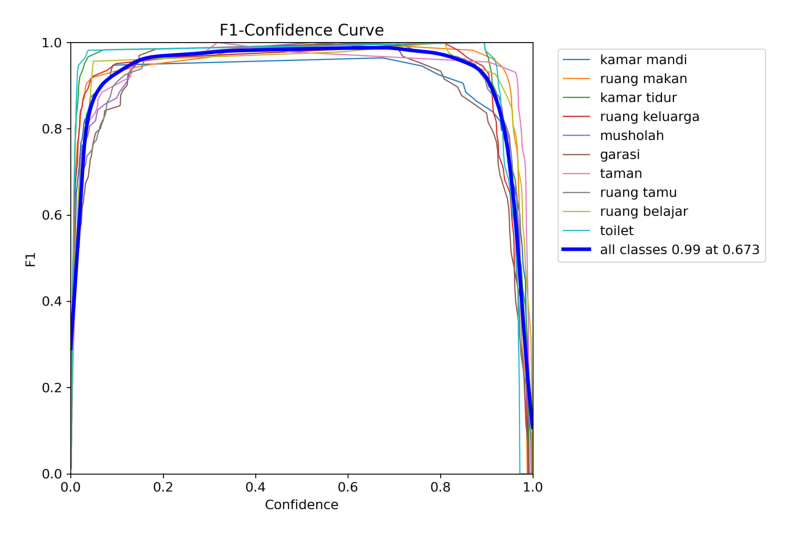

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

recall = ROOT_OUT+'/R_curve.png' 
f1 = ROOT_OUT+'/F1_curve.png' 
precision = ROOT_OUT+'/P_curve.png' 
PR = ROOT_OUT+'/PR_curve.png'

# Membaca gambar menggunakan matplotlib
imgR = mpimg.imread(recall)
imgP = mpimg.imread(precision)
imgPR = mpimg.imread(PR)
imgF1 = mpimg.imread(f1)

# Menampilkan gambar menggunakan pyplot
plt.figure(figsize=(10, 8))
plt.imshow(imgP)
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(imgR)
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(imgPR)
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(imgF1)
plt.axis('off')
plt.show()

In [17]:
# importing required modules 
from zipfile import ZipFile 
import os 

def get_all_file_paths(directory): 

	# initializing empty file paths list 
	file_paths = [] 

	# crawling through directory and subdirectories 
	for root, directories, files in os.walk(directory): 
		for filename in files: 
			# join the two strings in order to form the full filepath. 
			filepath = os.path.join(root, filename) 
			file_paths.append(filepath) 

	# returning all file paths 
	return file_paths		 

def main(): 
	# path to folder which needs to be zipped 
	directory = '/kaggle/working/runs'

	# calling function to get all file paths in the directory 
	file_paths = get_all_file_paths(directory) 

	# printing the list of all files to be zipped 
	print('Following files will be zipped:') 
	for file_name in file_paths: 
		print(file_name) 

	# writing files to a zipfile 
	with ZipFile('output.zip','w') as zip: 
		# writing each file one by one 
		for file in file_paths: 
			zip.write(file) 

	print('All files zipped successfully!')		 


if __name__ == "__main__": 
	main() 


Following files will be zipped:
/kaggle/working/runs/detect/train/confusion_matrix_normalized.png
/kaggle/working/runs/detect/train/R_curve.png
/kaggle/working/runs/detect/train/train_batch2.jpg
/kaggle/working/runs/detect/train/events.out.tfevents.1729413129.480d975b80c6.34.0
/kaggle/working/runs/detect/train/val_batch0_pred.jpg
/kaggle/working/runs/detect/train/train_batch0.jpg
/kaggle/working/runs/detect/train/confusion_matrix.png
/kaggle/working/runs/detect/train/val_batch0_labels.jpg
/kaggle/working/runs/detect/train/labels.jpg
/kaggle/working/runs/detect/train/PR_curve.png
/kaggle/working/runs/detect/train/labels_correlogram.jpg
/kaggle/working/runs/detect/train/train_batch1.jpg
/kaggle/working/runs/detect/train/results.csv
/kaggle/working/runs/detect/train/results.png
/kaggle/working/runs/detect/train/P_curve.png
/kaggle/working/runs/detect/train/F1_curve.png
/kaggle/working/runs/detect/train/args.yaml
/kaggle/working/runs/detect/train/weights/best.pt
/kaggle/working/runs/detect